In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv("/content/train.csv")
df.size


85000

In [ ]:
df.shape

(4250, 20)

In [ ]:
df.isnull().any()

state                            False
account_length                   False
area_code                        False
international_plan               False
voice_mail_plan                  False
number_vmail_messages            False
total_day_minutes                False
total_day_calls                  False
total_day_charge                 False
total_eve_minutes                False
total_eve_calls                  False
total_eve_charge                 False
total_night_minutes              False
total_night_calls                False
total_night_charge               False
total_intl_minutes               False
total_intl_calls                 False
total_intl_charge                False
number_customer_service_calls    False
churn                            False
dtype: bool

In [ ]:
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
label=le.fit_transform(df['international_plan'])
label

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
df.drop('international_plan',axis=1,inplace=True)
df['international_plan']=label

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
label=le.fit_transform(df['voice_mail_plan'])
label

array([1, 0, 0, ..., 0, 1, 1])

In [ ]:
df.drop('voice_mail_plan',axis=1,inplace=True)
df['voice_mail_plan']=label

In [ ]:
x=df.drop(['churn','state','area_code'],axis=1)
y=df['churn']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [ ]:
from sklearn.linear_model import LogisticRegression
cl=LogisticRegression(solver='liblinear')
cl.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [ ]:
y_test_hat=cl.predict(x_test)
res=pd.DataFrame({'actual':y_test,'pred':y_test_hat})
res.head()

,actual,pred
1366,no,no
1494,yes,no
52,no,no
2149,yes,no
938,no,no


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test,y_test_hat))
print(classification_report(y_test,y_test_hat))

[[724  13]
 [ 95  18]]
              precision    recall  f1-score   support

          no       0.88      0.98      0.93       737
         yes       0.58      0.16      0.25       113

    accuracy                           0.87       850
   macro avg       0.73      0.57      0.59       850
weighted avg       0.84      0.87      0.84       850



In [ ]:
from sklearn.tree import DecisionTreeClassifier
cl=DecisionTreeClassifier()
cl.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_test_hat=cl.predict(x_test)
res=pd.DataFrame({'act':y_test,'pred':y_test_hat})
res.head()

,act,pred
1366,no,no
1494,yes,yes
52,no,no
2149,yes,yes
938,no,no


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test,y_test_hat))
print(classification_report(y_test,y_test_hat))

[[705  32]
 [ 31  82]]
              precision    recall  f1-score   support

          no       0.96      0.96      0.96       737
         yes       0.72      0.73      0.72       113

    accuracy                           0.93       850
   macro avg       0.84      0.84      0.84       850
weighted avg       0.93      0.93      0.93       850



In [ ]:
from sklearn.ensemble import RandomForestClassifier
cl=RandomForestClassifier()
cl.fit(x_train,y_train)
y_test_hat=cl.predict(x_test)
res=pd.DataFrame({'act':y_test,'pred':y_test_hat})
res.head()

,act,pred
1366,no,no
1494,yes,no
52,no,no
2149,yes,yes
938,no,no


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test,y_test_hat))
print(classification_report(y_test,y_test_hat))

[[731   6]
 [ 32  81]]
              precision    recall  f1-score   support

          no       0.96      0.99      0.97       737
         yes       0.93      0.72      0.81       113

    accuracy                           0.96       850
   macro avg       0.94      0.85      0.89       850
weighted avg       0.95      0.96      0.95       850



In [ ]:
from sklearn.naive_bayes import GaussianNB
cl=GaussianNB()
cl.fit(x_train,y_train)
y_test_hat=cl.predict(x_test)
res=pd.DataFrame({'act':y_test,'pred':y_test_hat})
res.head()

,act,pred
1366,no,no
1494,yes,no
52,no,no
2149,yes,yes
938,no,yes


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test,y_test_hat))
print(classification_report(y_test,y_test_hat))

[[685  52]
 [ 53  60]]
              precision    recall  f1-score   support

          no       0.93      0.93      0.93       737
         yes       0.54      0.53      0.53       113

    accuracy                           0.88       850
   macro avg       0.73      0.73      0.73       850
weighted avg       0.88      0.88      0.88       850



In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
label=le.fit_transform(df['churn'])
label

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
df.drop('churn',axis=1,inplace=True)
df['churn']=label

In [ ]:
x=df.drop(['churn','state','area_code'],axis=1)
y=df['churn']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [ ]:
from xgboost import XGBClassifier
cl=XGBClassifier()
cl.fit(x_train,y_train)
y_test_hat=cl.predict(x_test)
res=pd.DataFrame({'act':y_test,'pred':y_test_hat})
res.head()

,act,pred
36,0,0
1783,0,0
2573,0,0
1756,0,0
455,0,0


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test,y_test_hat))
print(classification_report(y_test,y_test_hat))

[[734   9]
 [ 22  85]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       743
           1       0.90      0.79      0.85       107

    accuracy                           0.96       850
   macro avg       0.94      0.89      0.91       850
weighted avg       0.96      0.96      0.96       850



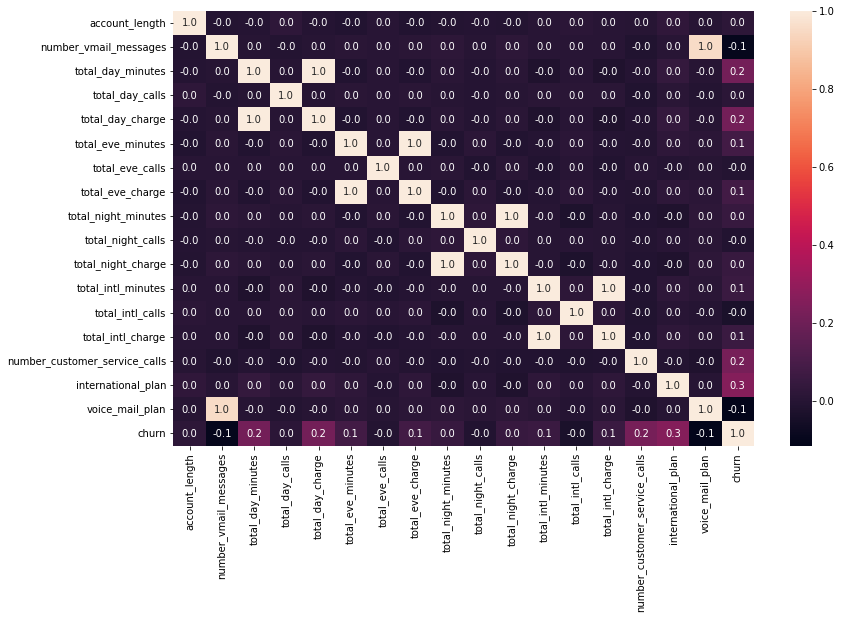

In [ ]:
import seaborn as sns
plt.figure(figsize=(13,8))
sns.heatmap(df.corr(),annot=True,fmt=".1f")
plt.show()

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
classifier=SVC(kernel='rbf')
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
y_pred


array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[1102    0]
 [ 170    3]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1102
           1       1.00      0.02      0.03       173

    accuracy                           0.87      1275
   macro avg       0.93      0.51      0.48      1275
weighted avg       0.88      0.87      0.81      1275



In [ ]:
import plotly.graph_objects as go

labels = ['LR','DT','RF','XGB','SVM','NB']
values = [86,93,97,95,87,86]

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.show()